In [2]:
import os 

#### The VGG CPU Energy consumption 

In [1]:
VGG_CPU_4GPU_PATH = "./CPU_vgg_four_GPU.csv"
VGG_CPU_3GPU_PATH = "./CPU_vgg_three_redo_GPU.csv"
VGG_CPU_2GPU_PATH = "./CPU_vgg_two_GPU.csv"
VGG_CPU_1GPU_PATH = "./CPU_vgg_one_GPU.csv"

In [4]:
def readfile(filename):
    file1 = open(filename, 'r')
    count = 0

    while count < 5:
        line = file1.readline()
        if not line:
            break
        print(line)
        count += 1
    
    file1.close()

In [5]:
def getUsage(filename):
    file1 = open(filename, 'r')
    count = 0

    while count < 5:
        line = file1.readline()
        if not line:
            break
        count += 1
        if count > 1:
            line = line.split(',')[-3:]
            usage = []
            for item in line:
                usage.append(float(item.split()[0]))
            print(usage)            
            
    file1.close()

In [6]:
def sum_CPU_Energy(filename):
    file1 = open(filename, 'r')
    count = 0
    sum_power = 0
    while True:
        line = file1.readline()
        if not line:
            break
        count += 1
        if count > 1:
            line = line.split(',')[-3:]
            power = float(line[0].split()[0])
            if power <= 0:
                print(power)
            if power > 0:
                sum_power += power            
    
    print("Count = {}, sum_power = {} W".format(count, sum_power))
    file1.close()

In [7]:
sum_CPU_Energy(VGG_CPU_1GPU_PATH)

-65479.3
-65469.0
-65469.2
-65485.1
Count = 4025, sum_power = 246234.70059999963 W


In [8]:
sum_CPU_Energy(VGG_CPU_2GPU_PATH)

-65443.2
-65435.4
-65420.2
Count = 2324, sum_power = 220019.05890000006 W


In [9]:
sum_CPU_Energy(VGG_CPU_3GPU_PATH)

-65433.7
-65381.1
-65420.2
Count = 1710, sum_power = 200244.50869999992 W


In [10]:
sum_CPU_Energy(VGG_CPU_4GPU_PATH)

-65407.5
-65390.5
-65424.6
Count = 1382, sum_power = 184245.53499999974 W


### VGG cpu usage 

In [3]:
def CPU_Usage(filename):
    file1 = open(filename, 'r')
    count = 0
    cpu_usage = []
    while True:
        line = file1.readline()
        if not line:
            break
        count += 1
        if count > 1:
            line = line.split(',')[-3:]
            cpu_usage.append([float(line[1].split()[0]), float(line[2].split()[0])])

    file1.close()        
    return cpu_usage        
    

In [4]:
import matplotlib.pyplot as plt

def draw_CPU_Usage(cpu_usage, filename):
    time = []
    usage = []
    for item in cpu_usage:
        usage.append(item[0])
        time.append(item[1])
    
    plt.figure(figsize=(10, 4))
    plt.plot(time, usage, linewidth=1)
    plt.xlabel('Time (s)')
    plt.ylabel('CPU usage %')
    plt.savefig(filename + '.png')
    plt.show()

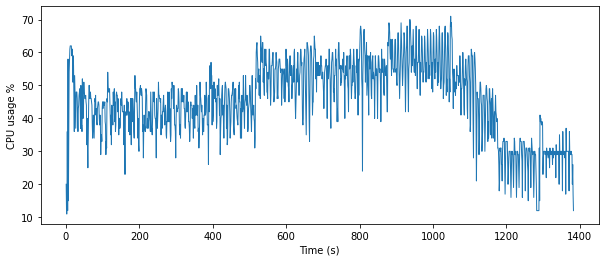

In [5]:
VGG_CPU_4GPU_Usage = CPU_Usage(VGG_CPU_4GPU_PATH)
draw_CPU_Usage(VGG_CPU_4GPU_Usage, 'VGG_CPU_4GPU_Usage')

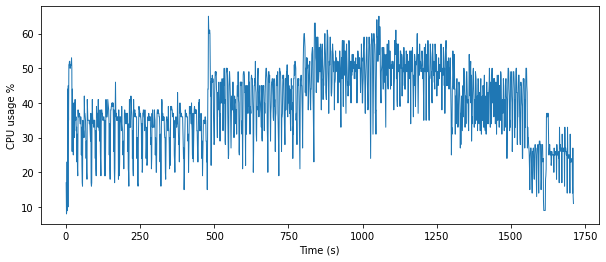

In [6]:
VGG_CPU_3GPU_Usage = CPU_Usage(VGG_CPU_3GPU_PATH)
draw_CPU_Usage(VGG_CPU_3GPU_Usage, 'VGG_CPU_3GPU_Usage')

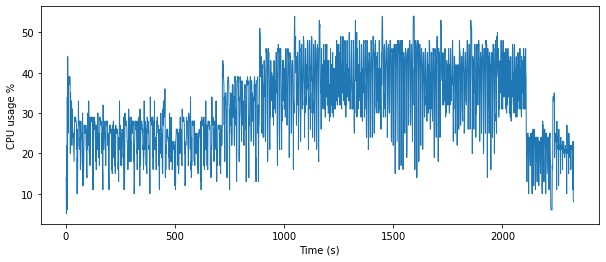

In [7]:
VGG_CPU_2GPU_Usage = CPU_Usage(VGG_CPU_2GPU_PATH)
draw_CPU_Usage(VGG_CPU_2GPU_Usage, 'VGG_CPU_2GPU_Usage')

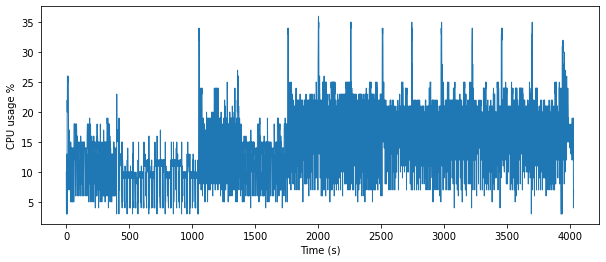

In [8]:
VGG_CPU_1GPU_Usage = CPU_Usage(VGG_CPU_1GPU_PATH)
draw_CPU_Usage(VGG_CPU_1GPU_Usage, 'VGG_CPU_1GPU_Usage')